# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [2]:
print('Marcelo Antunes Soares Fantini' + ' RA 108341')
print('Rubens de Castro Pereira' + ' RA 217146') 

Marcelo Antunes Soares Fantini RA 108341
Rubens de Castro Pereira RA 217146


## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **TIME**: Follow-up period (days);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df = pd.read_csv('data/heart_dataset.csv').drop(columns=['time'])
df.head(5)

# Why was the column "time" dropped?

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1


### Analysis

(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

In [29]:
# TODO: Preprocessing Dataset.

# looking for outliers in dataset
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,295.000000,297.000000,297.000000,297.000000,296.000000,297.000000,298.000000,299.00000
mean,60.946895,584.801347,38.003367,0.353535,263387.475405,1.397542,136.620805,0.32107
std,11.896148,972.874154,11.805432,0.478874,98295.456485,1.036956,4.419177,0.46767
min,40.000000,23.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.00000
25%,51.000000,118.000000,30.000000,0.000000,211750.000000,0.900000,134.000000,0.00000
50%,60.000000,250.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,0.00000
75%,70.000000,582.000000,45.000000,1.000000,304000.000000,1.400000,140.000000,1.00000
max,95.000000,7861.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.00000


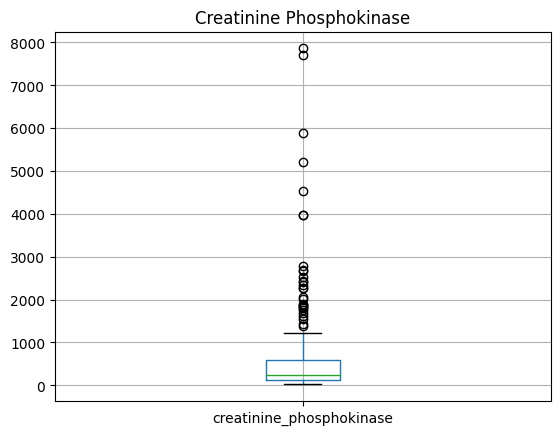

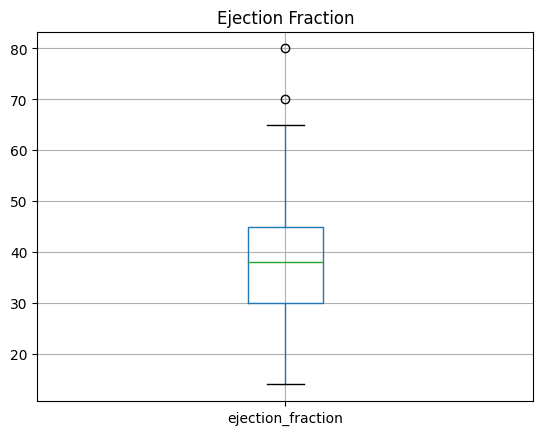

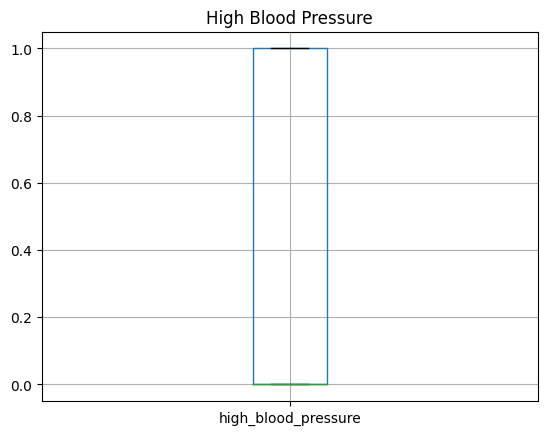

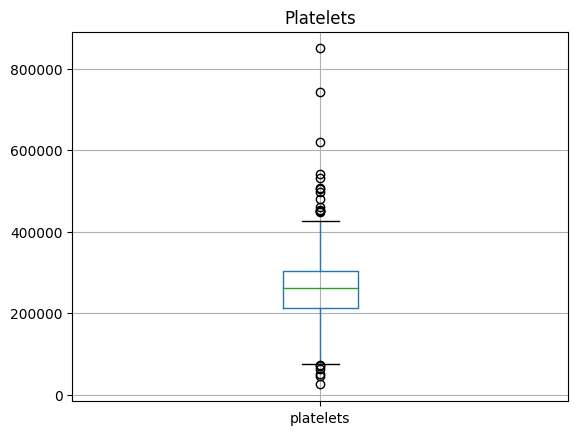

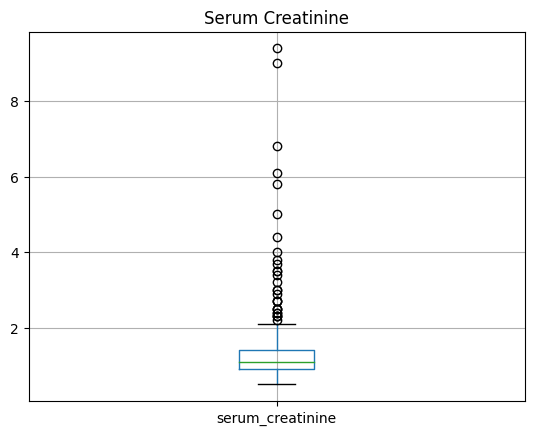

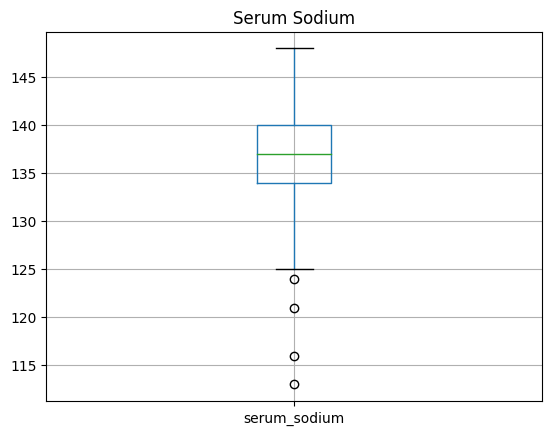

In [55]:
# showing plots to discover outliers 

# Plot the box plot of single column of DataFrame
b_plot = df.boxplot(column = ['creatinine_phosphokinase'])
b_plot.plot()
plt.title('Creatinine Phosphokinase')
plt.show() 

b_plot = df.boxplot(column = ['ejection_fraction'])
b_plot.plot()
plt.title('Ejection Fraction')
plt.show() 

b_plot = df.boxplot(column = ['high_blood_pressure'])
b_plot.plot()
plt.title('High Blood Pressure')
plt.show() 

b_plot = df.boxplot(column = ['platelets'])
b_plot.plot()
plt.title('Platelets')
plt.show() 

b_plot = df.boxplot(column = ['serum_creatinine'])
b_plot.plot()
plt.title('Serum Creatinine')
plt.show() 

b_plot = df.boxplot(column = ['serum_sodium'])
b_plot.plot()
plt.title('Serum Sodium')
plt.show()


In [57]:
# showing plots for the outliers by using the pyplot functions 

plt.figure(1)
fig = px.box(df, y='creatinine_phosphokinase', 
             title='Creatinine Phosphokinase', 
             labels={
                    "creatinine_phosphokinase": "Creatinine Phosphokinase"                    
                    }
            )
fig.show()

plt.figure(2)
fig = px.box(df, y='ejection_fraction')
fig = px.box(df, y='ejection_fraction', 
             title='Ejection Fraction', 
             labels={
                    "ejection_fraction": "Ejection Fraction"                    
                    }
            )
fig.show()

plt.figure(3)
fig = px.box(df, y='high_blood_pressure', 
             title='High Blood Pressure', 
             labels={
                    "high_blood_pressure": "High Blood Pressure"                    
                    }
            )
fig.show()

plt.figure(4)
fig = px.box(df, y='platelets', 
             title='Platelets', 
             labels={
                    "platelets": "Platelets"                    
                    }
            )
fig.show()

plt.figure(5)
fig = px.box(df, y='serum_creatinine', 
             title='Serum Creatinine', 
             labels={
                    "serum_creatinine": "Serum Creatinine"                    
                    }
            )
fig.show()

plt.figure(6)
fig = px.box(df, y='serum_sodium', 
             title='Serum Sodium', 
             labels={
                    "serum_sodium": "Serum Sodium"                    
                    }
            )
fig.show()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [60]:
# getting the NaN values in the columns as missing values 
df[df['creatinine_phosphokinase'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
253,70.0,No,NaN,Yes,35.0,1.0,236000.0,1.2,132.0,Male,No,0
298,50.0,No,NaN,No,45.0,0.0,395000.0,1.6,136.0,Female,Yes,0


In [61]:
# getting the NaN values in the columns as missing values 
df[df['ejection_fraction'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
254,53.0,Yes,446.0,No,NaN,1.0,263358.03,1.0,139.0,Female,No,0
281,70.0,No,582.0,NaN,NaN,0.0,51000.00,2.7,136.0,Female,Yes,0


In [62]:
# getting the NaN values in the columns as missing values 
df[df['high_blood_pressure'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
273,42.0,No,64.0,No,40.0,NaN,189000.0,0.7,140.0,Female,No,0
274,60.0,Yes,257.0,Yes,30.0,NaN,150000.0,1.0,137.0,Female,Yes,0


In [63]:
# getting the NaN values in the columns as missing values 
df[df['platelets'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
236,75.0,No,119.0,No,50.0,1.0,NaN,1.1,148.0,Female,No,0
288,65.0,No,892.0,Yes,35.0,0.0,NaN,1.1,142.0,Male,No,0
295,NaN,No,1820.0,No,38.0,0.0,NaN,1.2,139.0,Male,No,0


In [64]:
# getting the NaN values in the columns as missing values 
df[df['serum_creatinine'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
259,53.0,No,56.0,No,50.0,0.0,308000.0,NaN,135.0,Female,Yes,0
280,70.0,No,2695.0,Yes,40.0,0.0,241000.0,NaN,137.0,Female,No,0


In [65]:
# getting the NaN values in the columns as missing values 
df[df['serum_sodium'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
260,55.0,No,66.0,No,40.0,0.0,203000.0,1.0,NaN,Female,No,0


In [85]:
# getting all NaN values in the columns as missing values 
frames = [ 
    df[df['age'].isna()],
    df[df['anaemia'].isna()],
    df[df['creatinine_phosphokinase'].isna()],
    df[df['diabetes'].isna()],
    df[df['ejection_fraction'].isna()],
    df[df['high_blood_pressure'].isna()],
    df[df['platelets'].isna()],
    df[df['serum_creatinine'].isna()],
    df[df['serum_sodium'].isna()],
    df[df['sex'].isna()],
    df[df['smoking'].isna()],
    df[df['DEATH_EVENT'].isna()]
]

df_missing_values = pd.concat(frames, ignore_index=False)
df_missing_values.sort_index()
df_missing_values

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1
17,NaN,No,582.0,No,14.0,0.0,166000.00,0.8,127.0,Female,No,1
295,NaN,No,1820.0,No,38.0,0.0,NaN,1.2,139.0,Male,No,0
296,NaN,No,2060.0,Yes,60.0,0.0,742000.00,0.8,138.0,Male,No,0
294,62.0,NaN,61.0,Yes,38.0,1.0,155000.00,1.1,143.0,Female,Yes,0
253,70.0,No,NaN,Yes,35.0,1.0,236000.00,1.2,132.0,Male,No,0
298,50.0,No,NaN,No,45.0,0.0,395000.00,1.6,136.0,Female,Yes,0
276,70.0,No,618.0,NaN,35.0,0.0,327000.00,1.1,142.0,Male,No,0
281,70.0,No,582.0,NaN,NaN,0.0,51000.00,2.7,136.0,Female,Yes,0
254,53.0,Yes,446.0,No,NaN,1.0,263358.03,1.0,139.0,Female,No,0


In [82]:
print(f'-'*60)
print(f'Number of rows with missing values in any columns: {len(df_missing_values)} ')
print(f'-'*60)

------------------------------------------------------------
Number of rows with missing values in any columns: 24 
------------------------------------------------------------


In [96]:
# handling categorical variables 

# 1. anaemia: Yes or No
# 2. sex: Male or Female
# 3. smoking: Yes or No
# 4. DEATH_EVENT: 0 or 1

s_anaemia = pd.Series(df['anaemia'], dtype='category')
print(f'-'*30)
print(s_anaemia)
print()

s_sex = pd.Series(df['sex'], dtype='category')
print(f'-'*30)
print(s_sex)
print()

s_smoking = pd.Series(df['smoking'], dtype='category')
print(f'-'*30)
print(s_smoking)
print()

s_DEATH_EVENT = pd.Series(df['DEATH_EVENT'], dtype='category')
print(f'-'*30)
print(s_DEATH_EVENT)
print()


------------------------------
0       No
1       No
2       No
3      Yes
4      Yes
      ... 
294    NaN
295     No
296     No
297     No
298     No
Name: anaemia, Length: 299, dtype: category
Categories (2, object): ['No', 'Yes']

------------------------------
0      Female
1      Female
2      Female
3      Female
4        Male
        ...  
294    Female
295      Male
296      Male
297    Female
298    Female
Name: sex, Length: 299, dtype: category
Categories (2, object): ['Female', 'Male']

------------------------------
0       No
1       No
2      Yes
3       No
4       No
      ... 
294    Yes
295     No
296     No
297    Yes
298    Yes
Name: smoking, Length: 299, dtype: category
Categories (2, object): ['No', 'Yes']

------------------------------
0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: category
Categories (2, int64): [0, 1]



### Analysis Answers

**Item 1) Are there any outliers?**

We used the some tips in https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/ to help us to build the dataset analysis.

Evaluating the summary statistics of the dataset for each column:

1. age: no outliers, because the min and max values are around the mean value
2. creatinine_phosphokinase: we have outliers because the max value
   - mean: 584.801347	
   - min: 23.000000       (3.93% of the mean)
   - max: 7861.000000     (1344% of the mean)
3. ejection_fraction: no outliers
   - mean: 38.003367
   - min: 14.000000       (36.83% of the mean)
   - max: 80.000000       (2.10% of the mean)
4. high_blood_pressure: ???????????????
   - mean: 0.353535
   - min: 0.000000        (0% - this is an measure error??? The person is dieing!!)
   - max: 1.000000        (282.85% of the mean)
5. platelets: we have outliers because the max value
   - mean: 263387.475405
   - min: 25100.000000    (9.53% of the mean)
   - max: 850000.000000   (322.71% of the mean)
6. serum_creatinine: no outliers
   - mean: 1.397542
   - min: 0.500000        (35.77% of the mean)
   - max: 9.400000        (6.73% of the mean)
7. serum_creatinine: no outliers
   - mean: 1.397542
   - min: 0.500000        (35.77% of the mean)
   - max: 9.400000        (6.73% of the mean)
8. DEATH_EVENT: no outliers because it's a boolean data 


**Item 2) Are there missing values?**

Yes, there are about 24 rows with columns where any value is missing.


**Item 3) How will you handle categorical variables?**

In this dataset, we have the following columns with categorical variables:
1. anaemia: Yes or No
2. sex: Male or Female
3. smoking: Yes or No
4. "time" column was dropped
5. DEATH_EVENT: 0 or 1

We handle this values by using groups and couting the number of indivduals in each group.



## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blod based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

In [51]:
# TODO: Split data and normalize. You can use scikit-learn libraries.


### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

In [52]:
from sklearn.feature_selection import mutual_info_regression

# TODO: Feature selection.

> What are the conclusions? (1-2 paragraphs)

2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

In [53]:
# TODO: MSE Loss. You cannot use scikit-learn!!
def MSE():
  return None

In [54]:
# TODO: Linear Regression. Implement yout solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
class LinearRegression():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X):
    return None

  def fit(self, X, y):
    return None

In [55]:
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor

> What are the conclusions? (1-2 paragraphs)

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [56]:
# TODO: Plot the cost function vs. number of iterations in the training set.

> What are the conclusions? (1-2 paragraphs)

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [57]:
# TODO: Different learning rates. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)

5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [58]:
# TODO: Complex model. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

In [59]:
# TODO: Plot the true label and the predict label

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

In [60]:
from sklearn.feature_selection import mutual_info_classif

# TODO: Feature selection

> What are the conclusions? (1-2 paragraphs)

2. (2 points) Perform Multinomial Logistic Regression.

In [61]:
# TODO: Logistic Regression. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)


3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

In [62]:
# TODO: Oversampling. You can use scikit-learn and imblearn libraries.

In [63]:
# TODO: Undersampling. You can use scikit-learn and imblearn libraries.

> What are the conclusions? (1-2 paragraphs)

4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [64]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)

## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**